# Drive & Environment Setup

In [1]:
IN_COLAB = False

try:
  import google.colab
  IN_COLAB = True
except:
  pass

if IN_COLAB == True:
  from google.colab import drive
  drive.mount('/content/gdrive')
  %cd /content/gdrive/MyDrive/Tesi_GDrive
  PROJECT_PATH = '/content/gdrive/MyDrive/Tesi_GDrive'
  #!ls
else:
  %cd /Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive
  PROJECT_PATH = '/Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive'

import warnings
import pickle
import sys
import os

if IN_COLAB == True:
  sys.path.insert(0, os.path.abspath('functions'))
  sys.path.insert(0, os.path.abspath(''))
else:
  sys.path.insert(0, os.path.abspath('functions'))
  sys.path.insert(0, os.path.abspath(''))

warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, silhouette_samples
from keras.models import Sequential, Model
from keras.layers import Dense, Lambda
from keras.layers import Activation
from keras.activations import exponential, relu
from keras import backend as K
import tensorflow as tf
#from tensorflow.keras.layers import Input, Layer, InputSpec, Reshape
#from tensorflow.keras import initializers
#from tensorflow.keras.optimizers import Adam
tf.config.run_functions_eagerly(True)
from scipy.optimize import minimize, differential_evolution

from pkl import store_data, load_data
#from functions.compressor import compress
from functions.compressor_param import compress_2
from functions.mapping import ind2sub, sub2ind3d
from functions.clustering_foo import K_Medoids_elbow_best_model, K_Means_elbow_best_model, agglomerative_elbow

import random
from collections import defaultdict

import time

print("Libraries imported")

/Users/edoardorossi/Documents/Universita/Tesi/Tesi_GDrive


2023-06-06 15:38:58.622729: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Libraries imported


# Data Import

In [5]:
cta30_def_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_def.csv')  
df_def = pd.read_csv(cta30_def_path)


cta30_18_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2018.csv')
cta30_19_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2019.csv')
cta30_20_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2020.csv')
cta30_21_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2021.csv')
cta30_22_path = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clean_CTA_30_2022.csv')

df18= pd.read_csv(cta30_18_path)
df19= pd.read_csv(cta30_19_path)
df20= pd.read_csv(cta30_20_path)
df21= pd.read_csv(cta30_21_path)
df22= pd.read_csv(cta30_22_path)

df = pd.concat([df18, df19, df20, df21, df22], ignore_index=True)

#drop le colonne 'F_M_FDBK_00', 'VLV_RAF_REG_00', 'VLV_SUR_REG_00' 
df = df.drop(['F_M_FDBK_00', 'VLV_RAF_REG_00', 'VLV_SUR_REG_00'], axis=1)

[r,c] = df.shape
print("The dataset has", r, "rows and", c, "columns")



The dataset has 2176378 rows and 73 columns


# Data Preprocessing - "Compression"

## Normalization

In [11]:
scale_norm = MinMaxScaler()
df_norm = pd.DataFrame(scale_norm.fit_transform(df), columns=df.columns)
pca = PCA(n_components=0.9)
pca_norm = pca.fit_transform(df_norm)
print("The number of components chosen is", pca_norm.shape[1])

The number of components chosen is 7


## Standardization

In [10]:
st_scale = StandardScaler()
df_st = pd.DataFrame(st_scale.fit_transform(df), columns=df.columns)
pca = PCA(n_components=0.9)
pca_st = pca.fit_transform(df_st)
print("The number of components chosen is", pca_st.shape[1])

The number of components chosen is 21


# Data Preprocessing - "Clustering"

## K-Means

In [14]:
kmeans = KMeans(n_clusters=50, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(pca_norm)

KMeans(n_clusters=50, n_init=10, random_state=0)

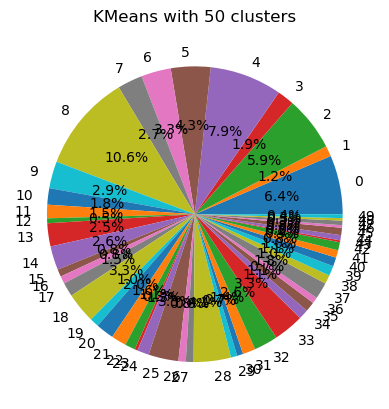

In [15]:
#plot the results of the clustering on pie chart
labels = kmeans.labels_
unique, counts = np.unique(labels, return_counts=True)
plt.pie(counts, labels=unique, autopct='%1.1f%%')
plt.title('KMeans with 50 clusters')
plt.show()


KMeans with 2 clusters computed in 6.344393968582153 seconds
KMeans with 3 clusters computed in 6.4450719356536865 seconds
KMeans with 4 clusters computed in 6.653914928436279 seconds
KMeans with 5 clusters computed in 9.189280986785889 seconds
KMeans with 6 clusters computed in 9.499720096588135 seconds
KMeans with 7 clusters computed in 10.884113073348999 seconds
KMeans with 8 clusters computed in 16.64304494857788 seconds
KMeans with 9 clusters computed in 41.279996156692505 seconds
KMeans with 10 clusters computed in 80.09195518493652 seconds
KMeans with 11 clusters computed in 68.2375500202179 seconds
KMeans with 12 clusters computed in 47.52220273017883 seconds
KMeans with 13 clusters computed in 54.750653982162476 seconds
KMeans with 14 clusters computed in 75.10325574874878 seconds
KMeans with 15 clusters computed in 44.78577899932861 seconds
KMeans with 16 clusters computed in 29.005485773086548 seconds
KMeans with 17 clusters computed in 27.195629119873047 seconds
KMeans with

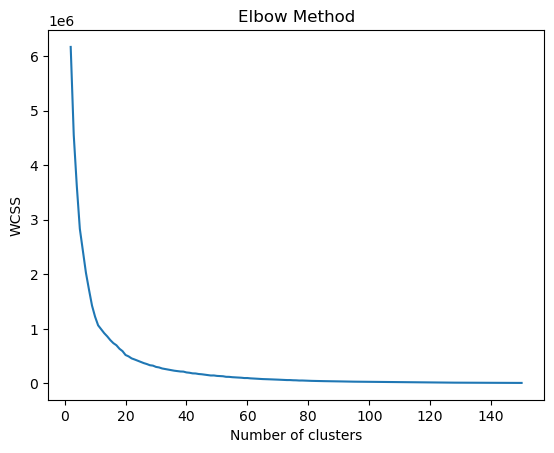

KMeans with 2 clusters computed in 7.364702939987183 seconds
KMeans with 3 clusters computed in 10.942653894424438 seconds
KMeans with 4 clusters computed in 14.799503087997437 seconds
KMeans with 5 clusters computed in 20.487384796142578 seconds
KMeans with 6 clusters computed in 20.834847927093506 seconds
KMeans with 7 clusters computed in 26.91595697402954 seconds
KMeans with 8 clusters computed in 24.96419596672058 seconds
KMeans with 9 clusters computed in 26.74108076095581 seconds
KMeans with 10 clusters computed in 25.99937105178833 seconds
KMeans with 11 clusters computed in 28.813119888305664 seconds
KMeans with 12 clusters computed in 31.6661159992218 seconds
KMeans with 13 clusters computed in 36.524474143981934 seconds
KMeans with 14 clusters computed in 39.46907305717468 seconds
KMeans with 15 clusters computed in 38.23369812965393 seconds
KMeans with 16 clusters computed in 39.6093909740448 seconds
KMeans with 17 clusters computed in 41.39931535720825 seconds
KMeans with 

In [16]:
k_min = 2
k_max = 150
w_norm = K_Means_elbow_best_model(pca_norm, k_min, k_max)
w_st = K_Means_elbow_best_model(pca_st, k_min, k_max)


Slopes of normalized data: [-858401.0038572159, -287033.3913209376, -226848.53595919302, -93647.28475752166, -68869.58689053862, -48574.93160699401, -47001.36330589681, -26788.1960116779, -19857.449507864938]
Slopes of standardized data: [-5094666.908643514, -2754934.106125464, -1946627.5244170465, -1121776.1335900724, -899996.9277129546, -1021196.2175429676, -562969.5105844159, -451233.80744914047, -334858.48092108517]


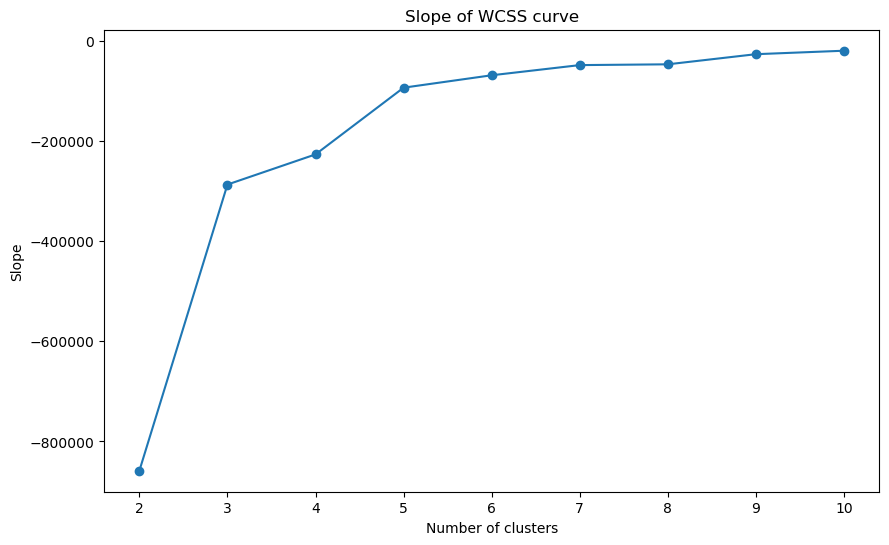

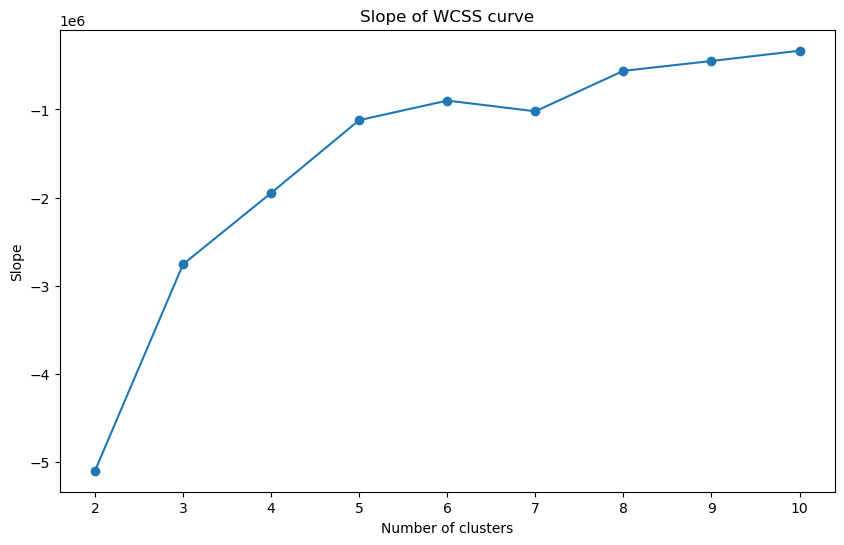

In [24]:
#calcola la pendenza dei segmenti della curva definita da wcss

def slope(wcss):
    slopes = []
    for i in range(1,len(wcss)):
        slopes.append((wcss[i]-wcss[i-1])/(i+1))
    return slopes

slopes_norm = slope(w_norm)
slopes_st = slope(w_st)

print("Slopes of normalized data:", slopes_norm)
print("Slopes of standardized data:", slopes_st)

#plot delle pendenze con bins e relativi punti

def plot_slopes(slopes, k_max=11):
    plt.figure(figsize=(10,6))
    plt.plot(range(2, k_max), slopes, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Slope')
    plt.title('Slope of WCSS curve')
    plt.show()

plot_slopes(slopes_norm, k_max)
plot_slopes(slopes_st, k_max)

In [17]:
a = [1,2,3,6,7,1,1]
b = a[:3]
b

[1, 2, 3]

## K-Medioids

In [ ]:
k_max = 3
K_Medoids_elbow_best_model(df_norm, k_max)
K_Medoids_elbow_best_model(df_st, k_max)


## Agglomerative

In [8]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt

# crea un array np di 10000 elementi casuali tra 0 e 1, ognuno da 10 features
X = np.random.rand(100000, 76)

# definizione del modello di clustering
model = AgglomerativeClustering(n_clusters=10, linkage='ward')

# esecuzione del clustering
labels = model.fit_predict(X)

# stampa dei risultati
print(labels)

# fai un plot a barre con il numero di elementi per cluster
plt.hist(labels, bins=10)
plt.show()


: 

: 

In [7]:
k_max = 3
#estrai un sottoinsieme di dati da df_norm e df_st
df_norm_sub = df_norm.sample(frac=0.1)
df_st_sub = df_st.sample(frac=0.1)

print("Shape of df_norm_sub:", df_norm_sub.shape)
print("Shape of df_st_sub:", df_st_sub.shape)


Shape of df_norm_sub: (217638, 76)
Shape of df_st_sub: (217638, 76)


In [9]:
pca = PCA(0.95)
pcadf = pca.fit_transform(df_norm_sub)
clustering = AgglomerativeClustering(n_clusters=3).fit(pcadf)
#agglomerative_elbow(df_norm_sub, k_max)
#agglomerative_elbow(df_st_sub, k_max)

: 

## Gaussian Mixture

# Model Generation

## Clustering Generation

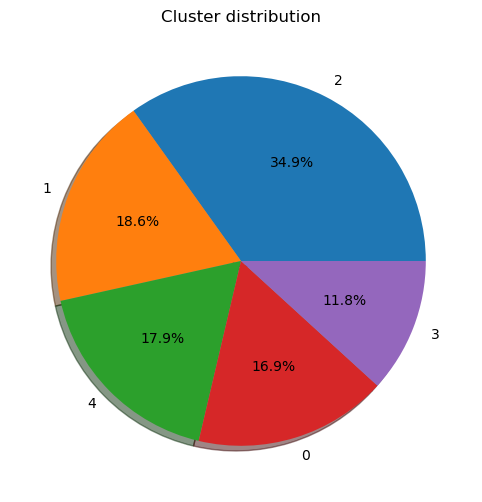

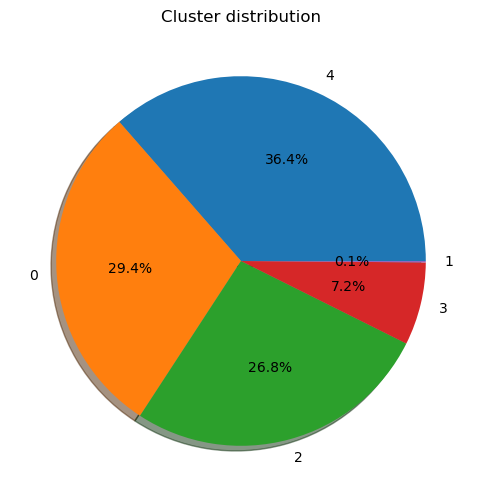

In [25]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_norm['cluster'] = kmeans.fit_predict(df_norm)

df_norm['cluster'].value_counts()

#pie graph of clusters
plt.figure(figsize=(10,6))
plt.pie(df_norm['cluster'].value_counts(), labels=df_norm['cluster'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.title('Cluster distribution')
plt.show()


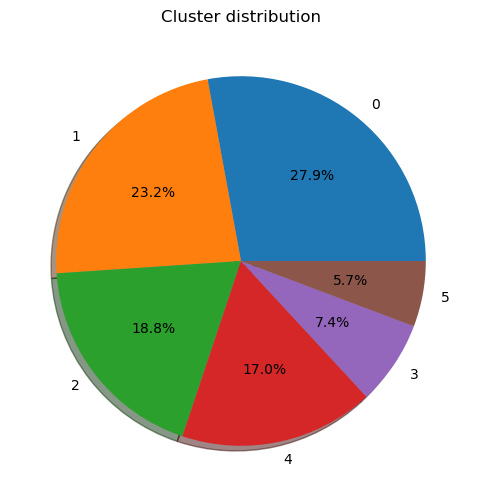

In [37]:

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)

df_st['cluster'] = kmeans.fit_predict(df_st)

df_st['cluster'].value_counts()

#pie graph of clusters
plt.figure(figsize=(10,6))
plt.pie(df_st['cluster'].value_counts(), labels=df_st['cluster'].value_counts().index, autopct='%1.1f%%', shadow=True)
plt.title('Cluster distribution')
plt.show()


In [27]:
#save the clusters
df_norm.to_csv(os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clustered/kmeans_norm.csv'), index=False)
df_st.to_csv(os.path.join(PROJECT_PATH, 'CTA30/DF_clean/clustered/kmeans_st.csv'), index=False)

## Actions Discretization

In [30]:
# Trova il valore più vicino dal basso per ogni azione
def valore_piu_vicino(lista, x):
    if x <= lista[0]:
        return lista[0]
    if x >= lista[-1]:
        return lista[-1]
    
    left = 0
    right = len(lista) - 1
    
    while left <= right:
        mid = (left + right) // 2
        
        if lista[mid] == x:
            return lista[mid]
        elif lista[mid] < x:
            left = mid + 1
        else:
            right = mid - 1
    
    if abs(lista[left] - x) < abs(lista[right] - x):
        return lista[left]
    else:
        return lista[right]
    

# Aggiungi un ultimo step agli intervalli di discretizzazione, così da considerare il valore massimo
def discretize_actions(min_value, max_value, num, upper):
    ret = np.linspace(min_value, max_value, num=num)
    if upper == True:
        step = ret[1] - ret[0]
        # add to last element step + ret[-1]
        ret = np.append(ret, step + ret[-1])
    return ret


[S, features] = df.shape

n_a1 = 15
n_a2 = 9
n_a3 = 9

a1_intervals = discretize_actions(df['F_M_FDBK_00'].min(), df['F_M_FDBK_00'].max(), num=n_a1, upper=True)
a2_intervals = discretize_actions(0, 1, num=n_a2, upper=True)
a3_intervals = discretize_actions(0, 1, num=n_a3, upper=True)
a1_intervals_list = a1_intervals.tolist()
a2_intervals_list = a2_intervals.tolist()
a3_intervals_list = a3_intervals.tolist()

a1_intervals = [round(num, 4) for num in a1_intervals_list]
a2_intervals = [round(num, 4) for num in a2_intervals_list]
a3_intervals = [round(num, 4) for num in a3_intervals_list]

for i in range(S):
    ret1 = valore_piu_vicino(a1_intervals, df.loc[i,'F_M_FDBK_00'])
    df.loc[i,'a1_discrete'] = ret1

    ret2 = valore_piu_vicino(a2_intervals, df.loc[i,'VLV_RAF_REG_00'])
    df.loc[i,'a2_discrete'] = ret2

    ret3 = valore_piu_vicino(a3_intervals, df.loc[i,'VLV_SUR_REG_00'])
    df.loc[i,'a3_discrete'] = ret3




KeyboardInterrupt: 

In [31]:
cta_partitioned = os.path.join(PROJECT_PATH, 'CTA30/DF_clean/df_partitioned.csv')  
df_part = pd.read_csv(cta_partitioned)

df_norm['a1_discrete'] = df_part['a1_discrete']
df_norm['a2_discrete'] = df_part['a2_discrete']
df_norm['a3_discrete'] = df_part['a3_discrete']

df_st['a1_discrete'] = df_part['a1_discrete']
df_st['a2_discrete'] = df_part['a2_discrete']
df_st['a3_discrete'] = df_part['a3_discrete']

n_a1 = 15
n_a2 = 9
n_a3 = 9


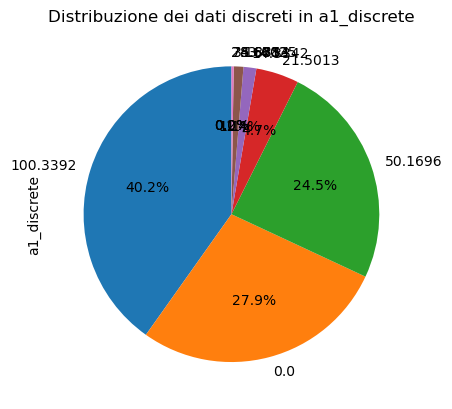

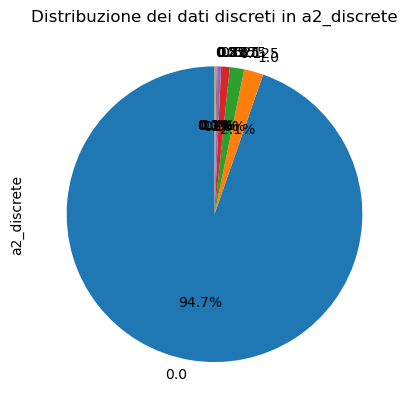

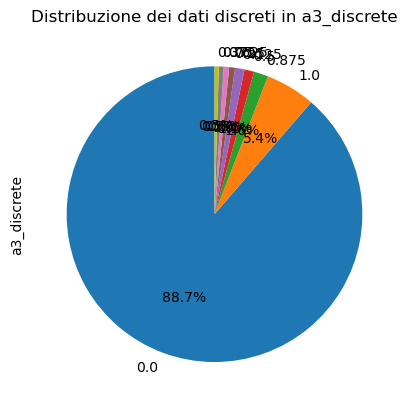

In [35]:
# Dati per il grafico a torta
labels = df_part['a1_discrete'].unique()
sizes = df_part['a1_discrete'].value_counts()

# Crea il grafico a torta
ax = sizes.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90)

# Aggiunge un titolo al grafico
ax.set_title("Distribuzione dei dati discreti in a1_discrete")

# Mostra il grafico
plt.show()

# Dati per il grafico a torta
labels = df_part['a2_discrete'].unique()
sizes = df_part['a2_discrete'].value_counts()

# Crea il grafico a torta
ax = sizes.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90)

# Aggiunge un titolo al grafico
ax.set_title("Distribuzione dei dati discreti in a2_discrete")

# Mostra il grafico
plt.show()

# Dati per il grafico a torta
labels = df_part['a3_discrete'].unique()
sizes = df_part['a3_discrete'].value_counts()

# Crea il grafico a torta
ax = sizes.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90)

# Aggiunge un titolo al grafico
ax.set_title("Distribuzione dei dati discreti in a3_discrete")

# Mostra il grafico
plt.show()


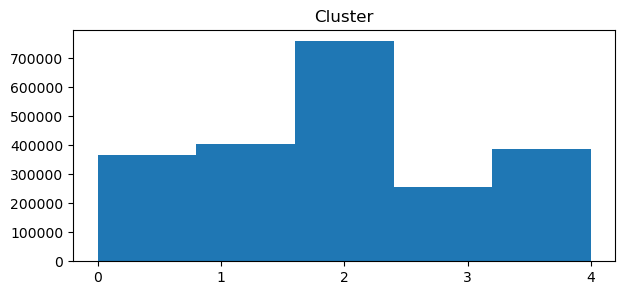

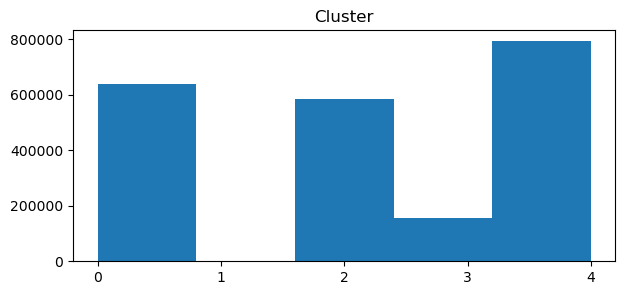

In [36]:
frequenze = df_norm['cluster'].value_counts().values
etichette = df_norm['cluster'].value_counts().index

# Crea il grafico a torta
plt.figure(figsize=(7,3))
plt.hist(etichette, bins=5, weights=frequenze)
plt.xticks(etichette)
plt.title("Cluster")
plt.show()

frequenze = df_st['cluster'].value_counts().values
etichette = df_st['cluster'].value_counts().index

# Crea il grafico a torta
plt.figure(figsize=(7,3))
plt.hist(etichette, bins=5, weights=frequenze)
plt.xticks(etichette)
plt.title("Cluster")
plt.show()

## Matrice di Transizione

In [42]:
a1_intervals = discretize_actions(df['F_M_FDBK_00'].min(), df['F_M_FDBK_00'].max(), num=n_a1, upper=True)
a2_intervals = discretize_actions(0, 1, num=n_a2, upper=True)
a3_intervals = discretize_actions(0, 1, num=n_a3, upper=True)
a1_intervals_list = a1_intervals.tolist()
a2_intervals_list = a2_intervals.tolist()
a3_intervals_list = a3_intervals.tolist()

a1_intervals = [round(num, 4) for num in a1_intervals_list]
a2_intervals = [round(num, 4) for num in a2_intervals_list]
a3_intervals = [round(num, 4) for num in a3_intervals_list]

print("a1_intervals:", a1_intervals)
print("a2_intervals:", a2_intervals)
print("a3_intervals:", a3_intervals)

a1_intervals: [0.0, 7.1671, 14.3342, 21.5013, 28.6683, 35.8354, 43.0025, 50.1696, 57.3367, 64.5038, 71.6709, 78.8379, 86.005, 93.1721, 100.3392, 107.5063]
a2_intervals: [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]
a3_intervals: [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125]


### T norm

In [49]:
## NUOVO TENTATIVO

n_A = n_a1 * n_a2 * n_a3
[S, features] = df.shape

n_cluster = df_norm['cluster'].max() + 1
T = np.zeros((n_cluster, n_cluster, n_A))

for s in range(S):

    s_cluster = df_norm.loc[s, 'cluster']
    if s != S-1:
        s_prime = s + 1
    else:
        break
    
    
    s_cluster_prime = df_norm.loc[s_prime-1, 'cluster']
    
    a_dis = [df_norm.loc[s, 'a1_discrete'], df_norm.loc[s, 'a2_discrete'], df_norm.loc[s, 'a3_discrete']]
    a1_index = a1_intervals.index(a_dis[0])
    a2_index = a2_intervals.index(a_dis[1])
    a3_index = a3_intervals.index(a_dis[2])
    a_coord = [a1_index, a2_index, a3_index]
    a = sub2ind3d((n_a1, n_a2, n_a3), a_coord)
    T[int(s_cluster), int(df_norm.loc[s_prime, 'cluster']), int(a)] += 1


for a in range(n_A):
    sum_a = T[:, :, a].sum(axis=1)
    T[:, :, a] = T[:, :, a] / np.maximum(sum_a, 1e-6)[:, np.newaxis]#T[:, :, a].sum(axis=1)[:, np.newaxis]
    if np.isnan(T).any() == True:
        print("T contiene dei nan")

#check if there is a nan in T
print("T sum: ", T.sum())
print("T nan: ", np.isnan(T).any())
print("T inf: ", np.isinf(T).any())
print("T max: ", np.max(T))


# Specifica il nome della directory cluster_model
cluster_model = 'cluster_df_norm'

# Crea il percorso completo per la directory cluster_model
cluster_model_directory = os.path.join(PROJECT_PATH, 'MDP_data', cluster_model)

# Crea la directory cluster_model se non esiste
if not os.path.exists(cluster_model_directory):
    os.makedirs(cluster_model_directory)
    print("Directory", cluster_model, "creata con successo!")

# Salvataggio dell'array T nella directory cluster_model
T_file_path = os.path.join(cluster_model_directory, 'T_' + cluster_model + '.npy')
np.save(T_file_path, T)
    



T sum:  301.0
T nan:  False
T inf:  False
T max:  1.0
Directory cluster_df_norm creata con successo!


### T st

In [50]:
## NUOVO TENTATIVO

n_A = n_a1 * n_a2 * n_a3
[S, features] = df.shape

n_cluster = df_st['cluster'].max() + 1
print("n_cluster:", n_cluster)
T = np.zeros((n_cluster, n_cluster, n_A))

for s in range(S):

    s_cluster = df_st.loc[s, 'cluster']
    if s != S-1:
        s_prime = s + 1
    else:
        break
    
    
    s_cluster_prime = df_st.loc[s_prime-1, 'cluster']
    
    a_dis = [df_st.loc[s, 'a1_discrete'], df_st.loc[s, 'a2_discrete'], df_st.loc[s, 'a3_discrete']]
    a1_index = a1_intervals.index(a_dis[0])
    a2_index = a2_intervals.index(a_dis[1])
    a3_index = a3_intervals.index(a_dis[2])
    a_coord = [a1_index, a2_index, a3_index]
    a = sub2ind3d((n_a1, n_a2, n_a3), a_coord)
    T[int(s_cluster), int(df_st.loc[s_prime, 'cluster']), int(a)] += 1


for a in range(n_A):
    sum_a = T[:, :, a].sum(axis=1)
    T[:, :, a] = T[:, :, a] / np.maximum(sum_a, 1e-6)[:, np.newaxis]#T[:, :, a].sum(axis=1)[:, np.newaxis]
    if np.isnan(T).any() == True:
        print("T contiene dei nan")

#check if there is a nan in T
print("T sum: ", T.sum())
print("T nan: ", np.isnan(T).any())
print("T inf: ", np.isinf(T).any())
print("T max: ", np.max(T))


# Specifica il nome della directory cluster_model
cluster_model = 'cluster_df_st'

# Crea il percorso completo per la directory cluster_model
cluster_model_directory = os.path.join(PROJECT_PATH, 'MDP_data', cluster_model)

# Crea la directory cluster_model se non esiste
if not os.path.exists(cluster_model_directory):
    os.makedirs(cluster_model_directory)
    print("Directory", cluster_model, "creata con successo!")

# Salvataggio dell'array T nella directory cluster_model
T_file_path = os.path.join(cluster_model_directory, 'T_' + cluster_model + '.npy')
np.save(T_file_path, T)
    

n_cluster: 6
T sum:  155.0
T nan:  False
T inf:  False
T max:  1.0
Directory cluster_df_st creata con successo!


### R norm

In [55]:
dfx = df_norm.copy()
n_clusters = dfx['cluster'].max() + 1
mean_reward = np.zeros(n_clusters)
R = np.zeros((n_clusters, n_A))

for i in range(n_clusters):
    mean_reward = dfx[dfx['cluster'] == i]['PW_ATT_M_00'].mean()
    for j in range(n_A):
        R[i,j] = -mean_reward

cluster_model = 'kmeans'

# Crea il percorso completo per la directory cluster_model
cluster_model_directory = os.path.join(PROJECT_PATH, 'MDP_data', cluster_model)

# Crea la directory cluster_model se non esiste
if not os.path.exists(cluster_model_directory):
    os.makedirs(cluster_model_directory)
    print("Directory", cluster_model, "creata con successo!")

# Salvataggio dell'array T nella directory cluster_model
R_file_path = os.path.join(cluster_model_directory, 'R_norm_kmeans.npy')
np.save(R_file_path, R)


Directory kmeans creata con successo!


In [ ]:

n_clusters = dfx['cluster'].max() + 1
R = np.zeros((n_cluster, n_A))
mr = np.load(os.path.join(PROJECT_PATH, 'MDP_data',  cluster_model, 'mr_' + cluster_model + '.npy'))

for i in range(n_cluster):
    for j in range(n_A):

        R[i,j] = -mr[i]

# save R as array on npy file calling R + cluster name
cluster_model = R_norm

# Crea il percorso completo per la directory cluster_model
cluster_model_directory = os.path.join(PROJECT_PATH, 'MDP_data', cluster_model)

# Crea la directory cluster_model se non esiste
if not os.path.exists(cluster_model_directory):
    os.makedirs(cluster_model_directory)
    print("Directory", cluster_model, "creata con successo!")

# Salvataggio dell'array T nella directory cluster_model
R_file_path = os.path.join(cluster_model_directory, 'R_' + cluster_model + '.npy')
np.save(R_file_path, R)

### R st

In [56]:
dfx = df_st.copy()
n_clusters = dfx['cluster'].max() + 1
mean_reward = np.zeros(n_clusters)
R = np.zeros((n_clusters, n_A))

for i in range(n_clusters):
    mean_reward = dfx[dfx['cluster'] == i]['PW_ATT_M_00'].mean()
    for j in range(n_A):
        R[i,j] = -mean_reward

cluster_model = 'kmeans'

# Crea il percorso completo per la directory cluster_model
cluster_model_directory = os.path.join(PROJECT_PATH, 'MDP_data', cluster_model)

# Crea la directory cluster_model se non esiste
if not os.path.exists(cluster_model_directory):
    os.makedirs(cluster_model_directory)
    print("Directory", cluster_model, "creata con successo!")

# Salvataggio dell'array T nella directory cluster_model
R_file_path = os.path.join(cluster_model_directory, 'R_st_kmeans6.npy')
np.save(R_file_path, R)